<a href="https://colab.research.google.com/github/Iasonaspg/ser-repo/blob/main/SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Acted Emotional Speech Dynamic Database.zip (Unzipped Files)/Acted Emotional Speech Dynamic Database/')
!ls 

 anger	 disgust   fear   happiness   sadness  'Tools and Documentation'


In [3]:
import numpy as np
import scipy
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

103
107536
fs:  22050 Hz Frame size:  0.046439909297052155 Seconds
(107536,) min:  -0.6059875  max: 0.70150906
(134473,) min:  -0.60221785  max: 0.7028133


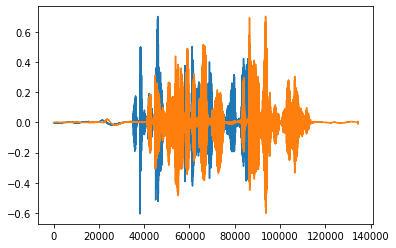

In [34]:
# load audio file
from pathlib import Path
fs = 22050
n_fft, hop = 1024, 256

def get_train_wav_dir(dir_name,fs=44100):
  return [ librosa.load(p,fs)[0] for p in Path().glob('./' + dir_name + '/train' + '/*.wav') ]

def get_test_wav_dir(dir_name,fs=44100):
  return [ librosa.load(p,fs)[0] for p in Path().glob('./' + dir_name + '/test' + '/*.wav') ]

anger_train_wav = get_train_wav_dir("anger",fs)
anger_test_wav = get_test_wav_dir("anger",fs)
print(len(anger_train_wav))
print(len(anger_train_wav[0]))
happy_train_wav = get_train_wav_dir("happiness",fs)
happy_test_wav = get_test_wav_dir("happiness",fs)
print('fs: ', fs, 'Hz', 'Frame size: ', n_fft/fs, 'Seconds')
print(anger_train_wav[0].shape, 'min: ', anger_train_wav[0].min(),' max:', anger_train_wav[0].max())
print(happy_train_wav[0].shape, 'min: ', happy_train_wav[0].min(),' max:', happy_train_wav[0].max())
# Diplay media player
display(Audio(anger_train_wav[0], rate=fs))
display(Audio(happy_train_wav[0], rate=fs))
plt.plot(anger_train_wav[0])
plt.plot(happy_train_wav[0])
plt.show()

In [ ]:
def spectrogram(wav,n_fft=256,hop_length=128,window='hamming'):
    D = librosa.stft(wav, n_fft, hop_length, window='hamming')
    spect, _ = librosa.magphase(D, power=1)
    return spect

spec = spectrogram(wav,256)

print('Spectrogram shape', spec.shape)
print('{min %.2f} {mean %.2f} {max %.2f}' % (np.amin(spec), np.mean(spec), np.amax(spec)))
plt.plot(wav)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(spec, origin='lower')
plt.show()

plt.hist(spec)
plt.show()

log_spec = librosa.power_to_db(spec ** 2, ref=np.min)
plt.figure(figsize=(10,10))
plt.imshow(log_spec, origin='lower',vmin=-60)
plt.show()
plt.hist(log_spec)
plt.xlabel('Magnitude (dB)')
plt.show()

In [48]:
from librosa.feature import spectral

# Gets a list of wav signals and returns a numpy array of features x nFrames_total and a list of len(input) containing the nFrames per signal
def extract_features(wav,label):
  spectral_centroid = spectral.spectral_centroid(wav[0], sr=fs, n_fft=n_fft, hop_length=hop)
  spectral_rolloff = spectral.spectral_rolloff(wav[0], sr=fs, hop_length=hop,roll_percent=0.30)
  zero_crossing_rate = spectral.zero_crossing_rate(wav[0], frame_length=n_fft, hop_length=hop)
  feature_vector = np.concatenate((spectral_centroid,spectral_rolloff,zero_crossing_rate),axis=0)
  nFrames = np.zeros((1,len(wav)))
  nFrames[0][0] = spectral_centroid.shape[1]
  for i in range(1,len(wav)):
    spectral_centroid = spectral.spectral_centroid(wav[i], sr=fs, n_fft=n_fft, hop_length=hop)
    spectral_rolloff = spectral.spectral_rolloff(wav[i], sr=fs, hop_length=hop,roll_percent=0.30)
    zero_crossing_rate = spectral.zero_crossing_rate(wav[i], frame_length=n_fft, hop_length=hop)
    feature_vector1 = np.concatenate((spectral_centroid,spectral_rolloff,zero_crossing_rate),axis=0)
    feature_vector = np.concatenate((feature_vector,feature_vector1),axis=1)
    nFrames[0][i] = spectral_centroid.shape[1]
  label_vec = [label for i in range(feature_vector.shape[1])]
  feature_vector = np.concatenate((feature_vector,np.array([label_vec])),axis=0)
  return feature_vector, nFrames



anger_train_feat_vec = extract_features(anger_train_wav,0)
anger_test_feat_vec = extract_features(anger_test_wav,0)
happy_train_feat_vec = extract_features(happy_train_wav,1)
happy_test_feat_vec = extract_features(happy_test_wav,1)
feature_train_vector = np.concatenate((anger_train_feat_vec,happy_train_feat_vec),axis=1)
feature_test_vector = np.concatenate((anger_test_feat_vec,happy_test_feat_vec),axis=1)


#print(spectral_centroid.shape)
#spectral_bandwidth = spectral.spectral_bandwidth(y=wav, sr=fs, hop_length=hop)
#spectral_contrast = spectral.spectral_contrast(y=wav, sr=fs, hop_length=hop, fmin=80.)
#spectral_flatness = spectral.spectral_flatness(y=wav, hop_length=hop)
#chromagram = librosa.feature.chroma_stft(wav, sr=fs, hop_length=hop)
# NO: rms = rms(y=wav, sr=fs, hop_length=hop)
# NO: Variance etc
#print(spectral_bandwidth.shape)
#print(spectral_contrast.shape)
#print(spectral_rolloff.shape)
#print(spectral_flatness.shape)
#print(zero_crossing_rate.shape)
#print(chromagram.shape)

#feature_vector = np.concatenate((spectral_centroid, 
#                                 spectral_bandwidth,
#                                 spectral_contrast,
#                                 spectral_rolloff,
#                                 spectral_flatness,
#                                 zero_crossing_rate,
#                                 chromagram), axis=0)

#feature_vector = np.concatenate((spectral_centroid,spectral_rolloff,zero_crossing_rate),axis=0)
#feature_vector2 = np.concatenate((spectral_centroid2,spectral_rolloff2,zero_crossing_rate2),axis=0)


print(anger_train_feat_vec.shape)
print(happy_train_feat_vec.shape)
print('=')
print(feature_train_vector.shape)
#print(feature_vector[:,0:2])

AxisError: ignored

In [49]:
nFrames = np.zeros((1,len(wav)))

NameError: ignored

In [19]:
import sklearn

#X_train, X_test, Y_train, Y_test  = sklearn.model_selection.train_test_split(feature_vector[0:3,:].T, feature_vector[3,:].T, train_size=0.7, shuffle=False)

#normalizer = sklearn.preprocessing.Normalizer().fit(trainset)

#train_norm = normalizer.transform(trainset) 
#test_norm = normalizer.transform(testset)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
#plt.hist(trainset)
#plt.show()
#plt.hist(testset)
#plt.show()

(55111, 3) (23619, 3)
(55111,) (23619,)


In [36]:
from sklearn import svm
import time
#X = np.concatenate((feature_vector[:,0:50000],happy_feat_vec[:,0:50000]),axis=1)
#y = np.concatenate((np.zeros((50000)),np.ones((50000))),axis=0)

#print(X.shape)
#print(y.shape)
clf = svm.SVC()
str = time.time()
clf.fit(feature_train_vector[0:3,:].T, feature_train_vector[3,:].T)
print(time.time()-str)
#print(feature_vector[:,3:5])
#clf.predict(feature_vector[:,200:240].T)

178.03729629516602


In [39]:
import statistics 
from statistics import mode 

def get_label(y):
  return mode(y)



In [47]:
from sklearn.metrics import accuracy_score

pred = clf.predict(feature_test_vector[0:3:,:].T)
print(accuracy_score(feature_test_vector[3:,:].T,pred,True))


0.5455113890129523


In [ ]:
a = librosa.load('./anger/a01 (1).wav',44100)
type(a[0])
len(a)
print(a[1])

44100
